## Model of the Sugar Factory Experiment

In [1]:
from model import Model
from dmchunk import Chunk
import numpy as np
import matplotlib.pyplot as plt

First we define a function that determines the output of the factory

In [2]:
def factory_output(w, prod):
    new_production = 2 * w - prod + np.random.randint(-1,1)
    if new_production > 12:
        new_production = 12
    elif new_production < 1:
        new_production = 1
    return new_production

Initialize some global variables that keep track of the state of the system

In [3]:
day = 1
production = 5
workers = np.random.randint(1,10)
target = 9

Initialize the model and set the retrieval threshold to a lower value (default = -1.0). Different values for rt will impact the outcome

In [4]:
m = Model()
m.rt = -2.0

If the model fails to retrieve an experience, we need a backup default strategy. Here we just pick a random number of workers. Alternatively, we can try different default strategies

In [5]:
def default_strategy(workers, production):
    return np.random.randint(1,10)

Run the model for a single day. It tries to retrieve an example from declarative memory. If this is successful, it follows the example. Otherwise it will carry out the default strategy. It then calculates the new production, and stores this as a chunk in memory.

In [6]:
def do_one_day(trace = True):
    global day
    global production
    global workers
    query = Chunk(name = "query", slots = {"yesterday" : production, "today" : target  })
    result, latency = m.retrieve_partial(query, trace = trace)
    if trace:
        print("Result of the retrieval is:", result)
    if result == None:
        workers = default_strategy(workers, production)
    else:
        workers = result.slots["workers"]
        m.add_encounter(result)
    m.time += latency
    new_production = factory_output(workers, production)
    new_chunk = Chunk(name = "experience" + str(day), slots ={"yesterday" : production, "workers":workers, "today" : new_production})
    m.add_encounter(new_chunk)
    production = new_production
    day += 1
    m.time += 5.0
    

Run a single subject for 80 trials, and return the accuracies.

In [7]:
def run_subject():
    global production
    global day
    global workers
    global m
    day = 1
    production = 5
    workers = np.random.randint(1,10)
    m = Model()
    m.rt = -2.0
    results = []
    for i in range(80):
        do_one_day(trace = False)
        if production >= 8 and production <= 10:
            results.append(1)
        else:
            results.append(0)
    return results

Run the experiment for n subjects, and plot the results

In [8]:
def run_experiment(n):
    totals = []
    for i in range(n):
        result = run_subject()
        if totals == []:
            totals = result
        else:
            totals = [x + y for x,y in zip(totals, result)]
    totals = [ x /n for x in totals]
    plt.plot(range(80), totals)

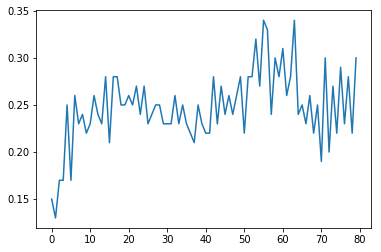

In [9]:
run_experiment(100)